<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [14]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

// needed to generate the Table of contents 
// taken from github.com/kmahelona/ipython_notebook_goodies

<IPython.core.display.Javascript object>

# Modeling
Importing modules and data from prevoius step


In [1]:
## Fit Models with Training Data Set
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from timeit import default_timer as timer
from tqdm.auto import tqdm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [3]:
#Load data and scaler model

X_train_scaled = pd.read_csv("../data/X_train_scaled.csv").to_numpy()
y_train = pd.read_csv("../data/y_train.csv").to_numpy().ravel()
X_test_scaled = pd.read_csv("../data/X_test_scaled.csv").to_numpy()
y_test = pd.read_csv("../data/y_test.csv").to_numpy().ravel()
feature_list = pd.read_csv("../data/feature_list.csv")
feature_list = pd.Index(list(feature_list["0"]))

scaler = joblib.load("../data/scaler.pkl")

In [4]:
train_df = pd.DataFrame(X_train_scaled, columns = feature_list)
train_df

,cycle_time,s2,s3,s4,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21
0,0.000000,0.183735,0.406802,0.309757,0.726248,0.242424,0.109755,0.369048,0.633262,0.205882,0.199608,0.363986,0.333333,0.713178,0.724662
1,0.002770,0.283133,0.453019,0.352633,0.628019,0.212121,0.100242,0.380952,0.765458,0.279412,0.162813,0.411312,0.333333,0.666667,0.731014
2,0.005540,0.343373,0.369523,0.370527,0.710145,0.272727,0.140043,0.250000,0.795309,0.220588,0.171793,0.357445,0.166667,0.627907,0.621375
3,0.008310,0.343373,0.256159,0.331195,0.740741,0.318182,0.124518,0.166667,0.889126,0.294118,0.174889,0.166603,0.333333,0.573643,0.662386
4,0.011080,0.349398,0.257467,0.404625,0.668277,0.242424,0.149960,0.255952,0.746269,0.235294,0.174734,0.402078,0.416667,0.589147,0.704502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,0.540166,0.686747,0.587312,0.782917,0.254428,0.439394,0.196491,0.726190,0.170576,0.558824,0.194344,0.656791,0.750000,0.271318,0.109500
20627,0.542936,0.701807,0.729453,0.866475,0.162641,0.500000,0.194651,0.708333,0.211087,0.500000,0.188668,0.727203,0.583333,0.124031,0.366197
20628,0.545706,0.665663,0.684979,0.775321,0.175523,0.515152,0.198196,0.738095,0.281450,0.529412,0.212148,0.922278,0.833333,0.232558,0.053991
20629,0.548476,0.608434,0.746021,0.747468,0.133655,0.530303,0.233285,0.916667,0.208955,0.514706,0.203065,0.823394,0.583333,0.116279,0.234466


In [5]:
test_df = pd.DataFrame(X_test_scaled, columns = feature_list)
test_df

,cycle_time,s2,s3,s4,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21
0,0.000000,0.545181,0.310661,0.269413,0.652174,0.212121,0.127614,0.208333,0.646055,0.220588,0.132160,0.308965,0.333333,0.558140,0.661834
1,0.002770,0.150602,0.379551,0.222316,0.805153,0.166667,0.146684,0.386905,0.739872,0.264706,0.204768,0.213159,0.416667,0.682171,0.686827
2,0.005540,0.376506,0.346632,0.322248,0.685990,0.227273,0.158081,0.386905,0.699360,0.220588,0.155640,0.458638,0.416667,0.728682,0.721348
3,0.008310,0.370482,0.285154,0.408001,0.679549,0.196970,0.105717,0.255952,0.573561,0.250000,0.170090,0.257022,0.250000,0.666667,0.662110
4,0.011080,0.391566,0.352082,0.332039,0.694042,0.166667,0.102396,0.273810,0.737740,0.220588,0.152751,0.300885,0.166667,0.658915,0.716377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,0.534626,0.611446,0.619359,0.566172,0.573269,0.181818,0.541326,0.500000,0.426439,0.176471,0.584890,0.564063,0.500000,0.395349,0.418669
13092,0.537396,0.605422,0.537388,0.671843,0.542673,0.227273,0.533743,0.446429,0.503198,0.308824,0.572350,0.485956,0.583333,0.333333,0.528721
13093,0.540166,0.671687,0.482014,0.414754,0.513688,0.318182,0.561249,0.428571,0.530917,0.235294,0.605326,0.507888,0.583333,0.372093,0.429301
13094,0.542936,0.617470,0.522128,0.626435,0.566828,0.257576,0.570403,0.452381,0.562900,0.294118,0.622046,0.562524,0.583333,0.403101,0.518779


## Fit Models with Training Data Set

Let's build some useful functions

In [34]:
def try_model(model, X_train, y_train, X_test, y_test):
    """ Fits a model on the selected data with the default parameters 
    ex. usage 
        summary = try_model(KNeighborsClassifier(),X_train, y_train)"""
    # statements
    print('Trying Model :'+ str(model))
    start = timer()
    model.fit(X_train, y_train)
    middle = timer()
    test_score = model.score(X_test, y_test)
    end = timer()
    train_score = model.score(X_train, y_train) 
    
    # calculate confusion matrix
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    print('|  Train Score: ' + str(round(train_score,3)))
    print('|  Test Score: ' + str(round(test_score,3)))
    
    train_elapsed = round(middle - start,3)
    test_elapsed = round(end - middle,3)

    summary = {'model': str(model),
               'training time [s]': train_elapsed,
               'test time [s]': test_elapsed,
               'test accuracy': test_score,
               'train accuracy': train_score,
              'confusion matrix': cm}
    #print(summary)
    
    return summary

In [81]:
def plot__multiclass_confusion_matrix(y_test, y_pred, categories):
    """Plots the confusion matrix given the data and the lables."""
    
    cm = confusion_matrix(y_test, y_pred)
    
    
    group_counts = ["{0:0.0f}\n".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
    
    
    box_labels = [f"{v2}{v3}".strip() for v2, v3 in zip(group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cm.shape[0],cm.shape[1])

    
    sns.heatmap(cm, annot=box_labels, fmt='', cmap='Blues', xticklabels=categories, yticklabels=categories)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label'+ stats_text)
 

In [82]:
models_summary = pd.DataFrame()



### Dummy Classifier


In [83]:
strategies = ['most_frequent', 'stratified', 'prior', 'uniform']

for s in tqdm(strategies) :
    res = try_model(DummyClassifier(strategy=s), X_train_scaled, y_train, X_test_scaled, y_test)
    models_summary = models_summary.append(res, ignore_index=True)


Trying Model :DummyClassifier(strategy='most_frequent')
|  Train Score: 0.515
|  Test Score: 0.761
Trying Model :DummyClassifier(strategy='stratified')
|  Train Score: 0.383
|  Test Score: 0.445
Trying Model :DummyClassifier(strategy='prior')
|  Train Score: 0.515
|  Test Score: 0.761
Trying Model :DummyClassifier(strategy='uniform')
|  Train Score: 0.331
|  Test Score: 0.324



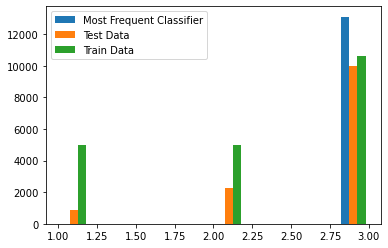

In [84]:
clf_dummy = DummyClassifier(strategy='most_frequent').fit(X_train_scaled, y_train)
y_dummy = clf_dummy.predict(X_test_scaled)
plt.hist([y_dummy, y_test, y_train])
plt.legend(['Most Frequent Classifier', 'Test Data', 'Train Data'])

In [85]:
print("Accuracy {}%".format(round(clf_dummy.score(X_test_scaled, y_test)*100,2)))

Accuracy 76.12%


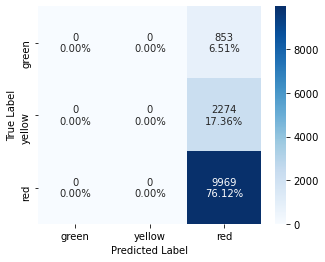

In [86]:
plot_confusion_matrix(y_test, clf_dummy.predict(X_test_scaled),['green','yellow','red'])

In [87]:
models_summary

,confusion matrix,model,test accuracy,test time [s],train accuracy,training time [s]
0,"[[0, 0, 853], [0, 0, 2274], [0, 0, 9969]]",DummyClassifier(strategy='most_frequent'),0.761225,0.001,0.515293,0.001
1,"[[212, 198, 443], [504, 552, 1218], [2341, 251...",DummyClassifier(strategy='stratified'),0.444563,0.003,0.382773,0.001
2,"[[0, 0, 853], [0, 0, 2274], [0, 0, 9969]]",DummyClassifier(strategy='prior'),0.761225,0.001,0.515293,0.001
3,"[[298, 259, 296], [746, 791, 737], [3347, 3350...",DummyClassifier(strategy='uniform'),0.324297,0.002,0.330910,0.001


--> The Dummy Classifier: Most Frequent has 0.761 Accuracy!



### Baseline model (does not behave. Skip for now)
Based on the istribution of the lifetimes of the dataset we choose the thresholds for our baseline model as:
- if cycle time is < 150 : Green
- if cycle time is < 200 : Yellow
- if cycle time is > 200 : Red

This is similar to a adopting a *scheduled maintenance* model where if the engine is above 150 cycles, we want to schedule service, if the engine is above 200 cycles, we urgently need to schedule service. 

![Distribution of Lifetimes](../figures/lifetimes_ecdf.png)





In [27]:
# def Baseline_predict (X) :
#     """Makes the baseline prediction
#     It considers only the cycle_time column X[0]
#     if x < 150 --> 3
#     if 150 < x < 200 -->2
#     if x >= 200 --> 1"""
#     green = 150 # normal = 3
#     yellow = 200 # warning = 2
#     # alarm = 1
#     y_pred = [3 if x < green else 2 if x < yellow else 1 for x in X[:,0]]
#     #check_service = lambda x : (3 if x < green else (2 if x < yellow else 1)) 
#     # = [(3 if x < green else (2 if x < yellow else 1)) for x in X]
#     return np.array(y_pred)

In [28]:
# y_baseline = Baseline_predict(scaler.inverse_transform(X_test_scaled))
# baseline_conf_matrix = confusion_matrix(y_test, y_baseline)
# #print(baseline_conf_matrix)
# df_cm = pd.DataFrame(baseline_conf_matrix, index = [1,2,3],
#                   columns = [1,2,3])
# plt.figure(figsize = (5,4))
# #_ = sns.heatmap(df_cm, annot=True, cmap='Blues')
# _ = sns.heatmap(df_cm/np.sum(df_cm), annot=True, fmt='.2%', cmap='Blues')


# unique_elements, counts_elements =  np.unique(y_baseline, return_counts=True)
# print(unique_elements)
# print(counts_elements)

### Test stock models (Default Parameters)
- KNeighborsClassifier
- SVC - Linear and RBF
- DecisionTreeClassifier
- RandomForestClassifier
- AdaBoostClassifier
- GradientBoostingClassifier




In [29]:
models_to_try = [GridSearchCV(DecisionTreeClassifier(),{'criterion':['gini', 'entropy'],'max_depth':np.arange(1,5,1)},cv=5),
                 KNeighborsClassifier(),
                 KNeighborsClassifier(n_neighbors=21),
                 DecisionTreeClassifier(),
                 DecisionTreeClassifier(criterion='gini',max_depth=3),
                 RandomForestClassifier(),
                 SVC(),
                 AdaBoostClassifier(),
                 GradientBoostingClassifier(),
                 KNeighborsClassifier(3),
                 SVC(kernel="linear", C=0.025),
                 RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
                ]


In [30]:
for m in tqdm(models_to_try) :
    res = try_model(m, X_train_scaled, y_train, X_test_scaled, y_test)
    models_summary = models_summary.append(res, ignore_index=True)
    


Trying Model :GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4])})
|  Train Score: 0.769
|  Test Score: 0.816
Trying Model :KNeighborsClassifier()
|  Train Score: 0.848
|  Test Score: 0.802
Trying Model :KNeighborsClassifier(n_neighbors=21)
|  Train Score: 0.821
|  Test Score: 0.826
Trying Model :DecisionTreeClassifier()
|  Train Score: 1.0
|  Test Score: 0.765
Trying Model :DecisionTreeClassifier(max_depth=3)
|  Train Score: 0.758
|  Test Score: 0.776
Trying Model :RandomForestClassifier()
|  Train Score: 1.0
|  Test Score: 0.833
Trying Model :SVC()
|  Train Score: 0.81
|  Test Score: 0.839
Trying Model :AdaBoostClassifier()
|  Train Score: 0.782
|  Test Score: 0.834
Trying Model :GradientBoostingClassifier()
|  Train Score: 0.831
|  Test Score: 0.836
Trying Model :KNeighborsClassifier(n_neighbors=3)
|  Train Score: 0.875
|  Test Score: 0.79
Trying Model :SVC(C=0.02

In [31]:
models_summary.sort_values(by=['test accuracy'], ascending=False)

,confusion matrix,model,test accuracy,test time [s],train accuracy,training time [s]
10,"[[520, 294, 39], [88, 1224, 962], [10, 716, 92...",SVC(),0.838958,5.433,0.810043,11.211
12,"[[576, 253, 24], [127, 1311, 836], [19, 886, 9...",GradientBoostingClassifier(),0.836210,0.044,0.831419,18.367
11,"[[585, 227, 41], [210, 1050, 1014], [85, 598, ...",AdaBoostClassifier(),0.833919,0.132,0.782027,1.582
9,"[[550, 272, 31], [106, 1296, 872], [19, 889, 9...",RandomForestClassifier(),0.832850,0.202,1.000000,3.917
6,"[[560, 253, 40], [133, 1198, 943], [32, 873, 9...",KNeighborsClassifier(n_neighbors=21),0.826359,5.345,0.821143,0.049
14,"[[519, 275, 59], [110, 947, 1217], [27, 589, 9...","SVC(C=0.025, kernel='linear')",0.826130,2.303,0.781785,7.280
15,"[[548, 190, 115], [169, 480, 1625], [39, 176, ...","RandomForestClassifier(max_depth=5, max_featur...",0.823305,0.011,0.778101,0.096
4,"[[490, 304, 59], [127, 778, 1369], [50, 498, 9...","GridSearchCV(cv=5, estimator=DecisionTreeClass...",0.816203,0.003,0.769182,3.027
5,"[[568, 239, 46], [235, 1116, 923], [112, 1040,...",KNeighborsClassifier(),0.801848,6.224,0.848093,0.073
13,"[[571, 234, 48], [293, 1040, 941], [191, 1043,...",KNeighborsClassifier(n_neighbors=3),0.790012,4.596,0.874509,0.050


In [35]:
cost = [[0,1,1],[1,0,1],[100,5,0]]

from sklearn.metrics import make_scorer

def my_cost_function(y_test, y_pred):
    cost_matrix = [[0,1,1],[1,0,1],[100,5,0]]
    conf_matrix = confusion_matrix(y_test, y_pred)
    loss = np.sum(conf_matrix*cost_matrix)
    return loss

my_score = make_scorer(my_cost_function, greater_is_better=False)

params = {'C' : np.arange(1,100,10)}

grid = GridSearchCV(SVC(),params,scoring=my_score,cv=5)

### Let's explore Decision Tree and see why I get 100% accuracy -> overfitting

In [ ]:
m = DecisionTreeClassifier()
m.fit(X_train_scaled, y_train)
test_score = m.score(X_test_scaled, y_test)
print("test score : "+ str(round(test_score,3)))
train_score = m.score(X_train_scaled, y_train)
print("train score : "+ str(round(train_score,3)))
# print best predictors
print(str(m.feature_importances_))

from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(m, 
                   feature_names=feature_list,  
                   class_names=['green','yellow','red'],
                   filled=True)

### GridSearchCV

- SVC - RBF

- GradientBoostingClassifier




In [23]:
# model_grid = {'KNeighborsClassifier':{'n_neighbors':np.arange(1,101,10)},
#              'DecisionTreeClassifier':{'criterion':['gini', 'entropy'],
#                                        'max_depth':np.arange(2,10,1)},
#              'RandomForestClassifier':{'n_estimators':np.arange(50,201,50),
#                                        'criterion':['gini', 'entropy'],
#                                        'max_depth':np.arange(1,11,2)},
#               'SVC_linear':{'C' : np.arange(1,100,10),
#                      'kernel': ['linear'],
#                      'gamma' : ['scale','auto']},
#               'SVC_RBF':{'C' : np.arange(1,100,10),
#                      'kernel': ['rbf'],
#                      'gamma' : ['scale','auto']},
#               'AdaBoostClassifier':{'n_estimators': [10,20,30,40,50],
#                                     'learning_rate': [0.05, 0.1, 0.25, 0.5, 0.75, 1]},
#               'GradientBoostingClassifier':{'n_estimators': [10,20,30,40,50],
#                                             'learning_rate': [0.05, 0.1, 0.25, 0.5, 0.75, 1],
#                                             'max_features': [2,3,4,5,6,7,8,9],
#                                             'max_depth' : [2,3,4,5,6]},
#               'XGBClassifier':{'learning_rate': np.arange(0.01, 1.0,0.5),
#                                'n_estimators': np.arange(100, 1000,500),
#                                'max_depth': np.arange(3,10,3),
#                                'gamma': np.arange(0, 5,2)}
#              }              

In [32]:
model_grid = {'SVC_RBF':{'C' : np.arange(1,100,10),
                     'kernel': ['rbf'],
                     'gamma' : ['scale','auto']},
              'GradientBoostingClassifier':{'n_estimators': [10,20,30,40,50],
                                            'learning_rate': [0.05, 0.1, 0.25, 0.5, 0.75, 1],
                                            'max_features': [2,3,4,5,6,7,8,9],
                                            'max_depth' : [2,3,4,5,6]},
             }              

In [33]:
for m in tqdm(model_grid.keys()):
    print(m)

SVC_RBF
GradientBoostingClassifier



In [ ]:
# XGBoost
from xgboost import XGBClassifier
param_grid = {'learning_rate': np.arange(0.01, 1.0,0.5),
                               'n_estimators': np.arange(100, 1000,500),
                               'max_depth': np.arange(3,10,3),
                               'gamma': np.arange(0, 5,2)}

xgb = XGBClassifier()
xgb_cv= GridSearchCV(xgb,param_grid,cv=3)
start = timer()
xgb_cv.fit(X_train_scaled,y_train)
end = timer()
print(str(round(end - start,3)) + ' seconds elapsed.')

#print("Best Score:" + str(xgb_cv.best_score_))
#print("Best Parameters: " + str(xgb_cv.best_params_))

In [ ]:
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')

# Calling Method 
plot_grid_search(tree_cv.cv_results_, param_grid['max_depth'], param_grid['criterion'], 'max_depth', 'criterion' )

In [ ]:
print("Best Score:" + str(xgb_cv.best_score_))
print("Best Parameters: " + str(xgb_cv.best_params_))

## Review Model Outcomes — Iterate over additional models as needed.
-> pick top 2  and run hyperparameters tuning


## Bayesian Optimization

```python
def hyperparam_loss(param_x, param_y):
    
    # 1. Define machine learning model using param_x, param_y as hyper parameters
    # 2. Train the model
    # 3. Calculate loss on cross-validation set
    
    return loss
```

In [ ]:
# Decision Tree
param_grid = {'criterion':['gini', 'entropy'],
              'max_depth':np.arange(1,11,2),
              }
tree = DecisionTreeClassifier()
tree_cv= GridSearchCV(tree,param_grid,cv=5)
start = timer()
tree_cv.fit(X_train_scaled,y_train)
end = timer()
print(str(round(end - start,3)) + ' seconds elapsed.')
print("Best Score:" + str(tree_cv.best_score_))
print("Best Parameters: " + str(tree_cv.best_params_))

In [ ]:
from bayes_opt import BayesianOptimization
# XGBoost
from xgboost import XGBClassifier

pbounds = {
    'learning_rate': (0.01, 1.0),
    'n_estimators': (100, 1000),
    'max_depth': (3,10),
    'subsample': (1.0, 1.0),  # Change for big datasets
    'colsample': (1.0, 1.0),  # Change for datasets with lots of features
    'gamma': (0, 5)}

def xgboost_hyper_param(learning_rate,
                        n_estimators,
                        max_depth,
                        subsample,
                        colsample,
                        gamma):

    max_depth = int(max_depth)
    n_estimators = int(n_estimators)

    clf = XGBClassifier(
        max_depth=max_depth,
        learning_rate=learning_rate,
        n_estimators=n_estimators,
        gamma=gamma)
    return np.mean(cross_val_score(clf, X_train_scaled, y_train, cv=3, scoring='accuracy'))

optimizer = BayesianOptimization(
    f=xgboost_hyper_param,
    pbounds=pbounds,
    random_state=1,
)

In [ ]:
start = timer()
optimizer.maximize(n_iter=10, init_points=2)
end = timer()
print(str(round(end - start,3)) + ' seconds elapsed.')

In [ ]:
optimizer.max

## Identify the Final Model
choose final model and make predictions